In [1]:
# Import necessary modules and functions from other Python files in the project
from utils import (
    torch,  # PyTorch library
    is_cuda_available,  # Function to check if CUDA is available
    get_device,  # Function to get the device (CPU or GPU) to be used for training
    GetCorrectPredCount, # Function to get the number of correct predictions
    train,  # Function to train the model
    test,  # Function to test the model
    plot_losses,  # Function to plot the losses
)

from model import (
    nn,  # PyTorch's neural network module
    Net,  # Custom neural network model,
    F # PyTorch's functional module
)

from torchvision import datasets, transforms # Torchvision contains popular datasets, model architectures, and common image transformations for computer vision
import torch.optim as optim  # PyTorch's optimization module

In [2]:
print("CUDA Available?", is_cuda_available())
device = get_device()

CUDA Available? True


In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    # Randomly apply center crop of size 22 to the image with probability 0.1
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    # Resize the image to size 28x28
    transforms.Resize((28, 28)),
    # Randomly rotate the image by an angle between -15 and 15 degrees
    transforms.RandomRotation((-15., 15.), fill=0),
    # Convert the image to a tensor
    transforms.ToTensor(),
    # Normalize the image with mean and standard deviation of MNIST dataset
    transforms.Normalize((0.1307,), (0.3081,))
])

# Test data transformations
test_transforms = transforms.Compose([
    # Convert the image to a tensor
    transforms.ToTensor(),
    # Normalize the image with mean and standard deviation of MNIST dataset
    transforms.Normalize((0.1307,), (0.3081,))
])

In [4]:
# Load the MNIST train and test datasets and apply the respective transformations
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 512773942.33it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 112162679.47it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 138373177.20it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 8279238.93it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [5]:

# Set the batch size for the data loaders
batch_size = 512

# Set the data loader arguments
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

# Create the test and train data loaders
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

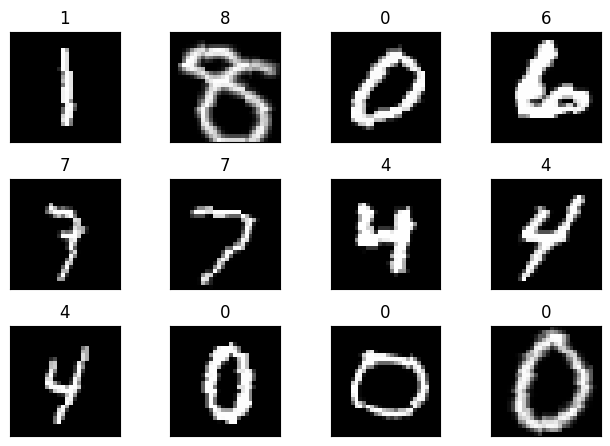

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [7]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2648 Batch_id=117 Accuracy=64.19: 100%|██████████| 118/118 [00:30<00:00,  3.88it/s]


Test set: Average loss: 0.1626, Accuracy: 9512/10000 (95.12%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0454 Batch_id=117 Accuracy=95.02: 100%|██████████| 118/118 [00:26<00:00,  4.48it/s]


Test set: Average loss: 0.0761, Accuracy: 9762/10000 (97.62%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1345 Batch_id=117 Accuracy=96.56: 100%|██████████| 118/118 [00:22<00:00,  5.32it/s]


Test set: Average loss: 0.0524, Accuracy: 9828/10000 (98.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0330 Batch_id=117 Accuracy=97.25: 100%|██████████| 118/118 [00:21<00:00,  5.40it/s]


Test set: Average loss: 0.0432, Accuracy: 9854/10000 (98.54%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0679 Batch_id=117 Accuracy=97.71: 100%|██████████| 118/118 [00:22<00:00,  5.31it/s]


Test set: Average loss: 0.0425, Accuracy: 9867/10000 (98.67%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0312 Batch_id=117 Accuracy=98.09: 100%|██████████| 118/118 [00:21<00:00,  5.42it/s]


Test set: Average loss: 0.0391, Accuracy: 9877/10000 (98.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0522 Batch_id=117 Accuracy=98.26: 100%|██████████| 118/118 [00:20<00:00,  5.69it/s]


Test set: Average loss: 0.0358, Accuracy: 9880/10000 (98.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1559 Batch_id=117 Accuracy=98.28: 100%|██████████| 118/118 [00:20<00:00,  5.64it/s]


Test set: Average loss: 0.0384, Accuracy: 9876/10000 (98.76%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0167 Batch_id=117 Accuracy=98.39: 100%|██████████| 118/118 [00:21<00:00,  5.48it/s]


Test set: Average loss: 0.0280, Accuracy: 9903/10000 (99.03%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0481 Batch_id=117 Accuracy=98.50: 100%|██████████| 118/118 [00:22<00:00,  5.25it/s]


Test set: Average loss: 0.0314, Accuracy: 9897/10000 (98.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0141 Batch_id=117 Accuracy=98.61: 100%|██████████| 118/118 [00:22<00:00,  5.34it/s]


Test set: Average loss: 0.0268, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1088 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:22<00:00,  5.24it/s]


Test set: Average loss: 0.0268, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0088 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:22<00:00,  5.30it/s]


Test set: Average loss: 0.0308, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0113 Batch_id=117 Accuracy=98.88: 100%|██████████| 118/118 [00:22<00:00,  5.26it/s]


Test set: Average loss: 0.0230, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0286 Batch_id=117 Accuracy=98.88: 100%|██████████| 118/118 [00:22<00:00,  5.28it/s]


Test set: Average loss: 0.0287, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0333 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:21<00:00,  5.51it/s]


Test set: Average loss: 0.0209, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0141 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [00:20<00:00,  5.73it/s]


Test set: Average loss: 0.0205, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0303 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:21<00:00,  5.61it/s]


Test set: Average loss: 0.0207, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0015 Batch_id=117 Accuracy=99.22: 100%|██████████| 118/118 [00:22<00:00,  5.25it/s]


Test set: Average loss: 0.0204, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0019 Batch_id=117 Accuracy=99.23: 100%|██████████| 118/118 [00:22<00:00,  5.30it/s]


Test set: Average loss: 0.0204, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.


This below function is used to plot the training and test losses and accuracies of a PyTorch neural network model trained on the MNIST dataset. It creates a 2x2 grid of subplots and plots the training loss, training accuracy, test loss, and test accuracy on each subplot, respectively. The `train_losses`, `train_acc`, `test_losses`, and `test_acc` variables are lists that contain the loss and accuracy values of the model on the training and test datasets, respectively, at each epoch. This code can be used to visualize the performance of the model during training and testing and to identify any overfitting or underfitting issues.

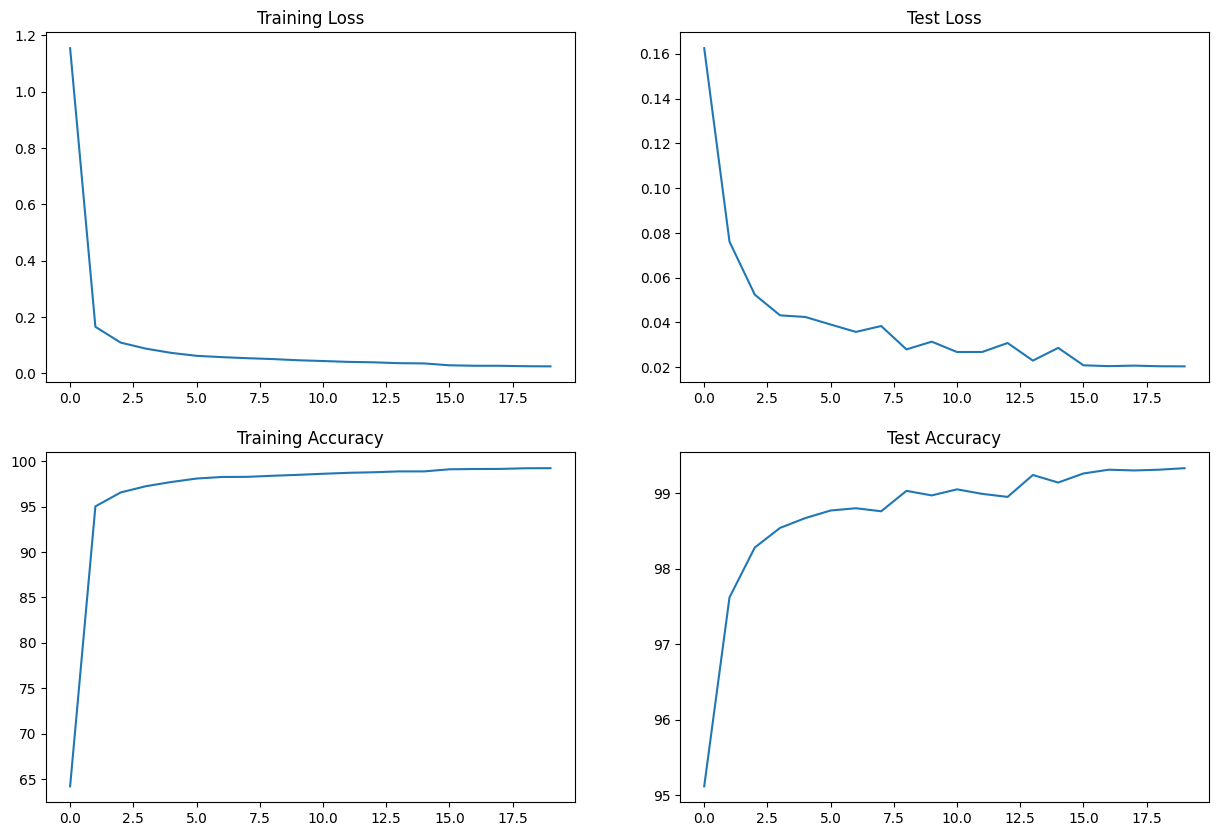

In [8]:
plot_losses()